In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("data.csv")

In [5]:
df.head()

,ID,Age,Income,Gender,Martial Status,Buys
0,1,0-21,High,Male,Single,No
1,2,0-21,High,Male,Married,No
2,3,21-35,High,Male,Single,Yes
3,4,35-100,Medium,Male,Single,Yes
4,5,35-100,Low,Female,Single,Yes


In [6]:
df.isnull()

,ID,Age,Income,Gender,Martial Status,Buys
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [12]:
df.isnull().sum()

ID                0
Age               0
Income            0
Gender            0
Martial Status    0
Buys              0
dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [19]:
df['Age'] = label_encoder.fit_transform(df['Age'])
df['Income'] = label_encoder.fit_transform(df['Income'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Martial Status'] = label_encoder.fit_transform(df['Martial Status'])

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = df.drop('Buys', axis=1)
y = df['Buys']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)


RandomForestClassifier()

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = clf.predict(X_test)

In [25]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00         1
         Yes       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

[[1 0]
 [0 2]]


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
cm = confusion_matrix(y_test, y_pred)

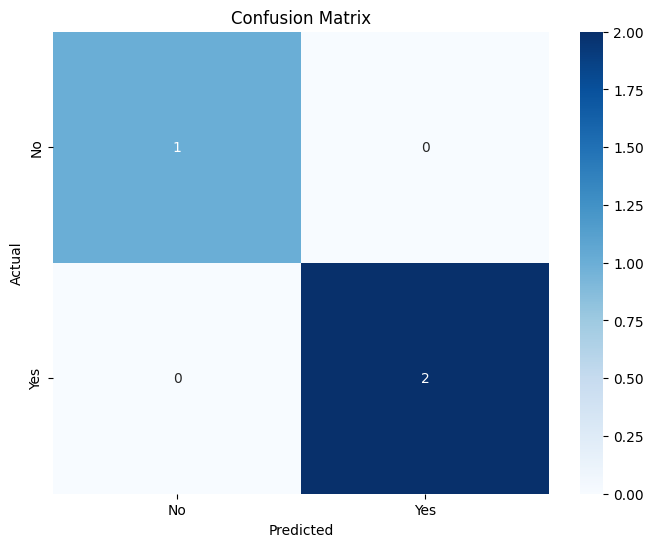

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

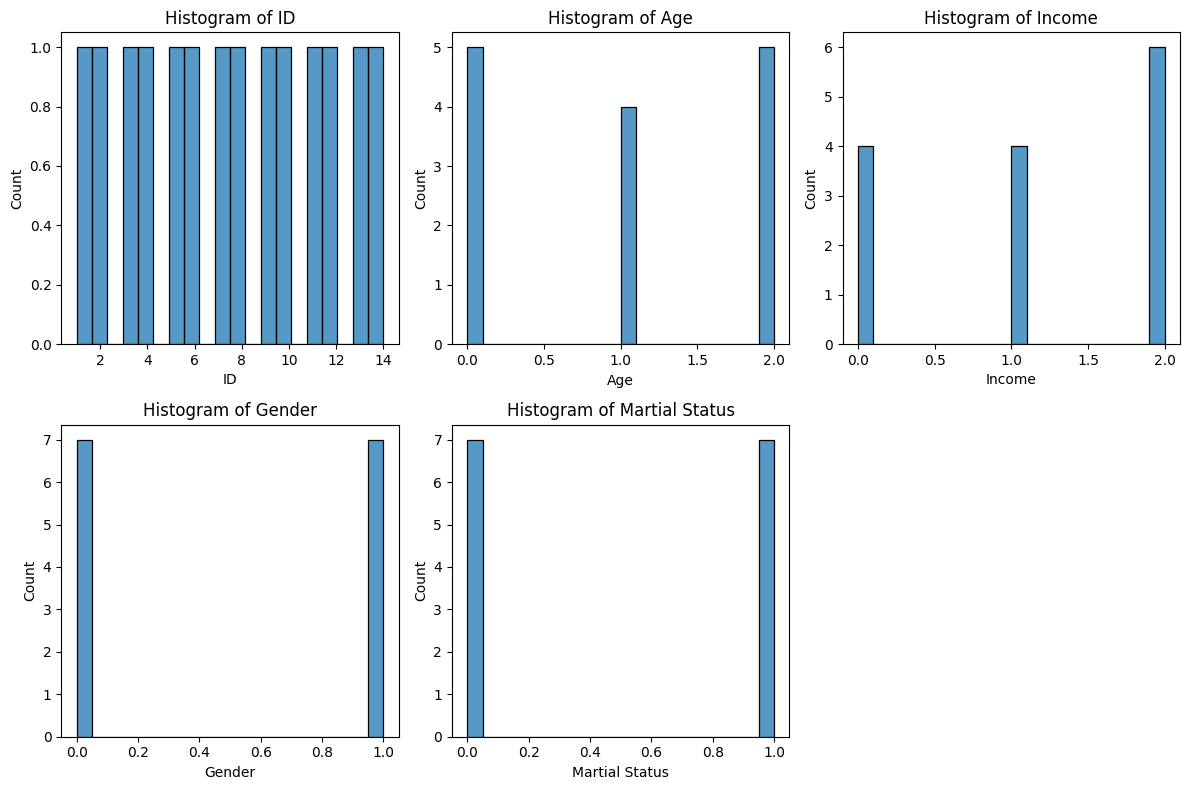

In [29]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[column], kde=False, bins=20)
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()

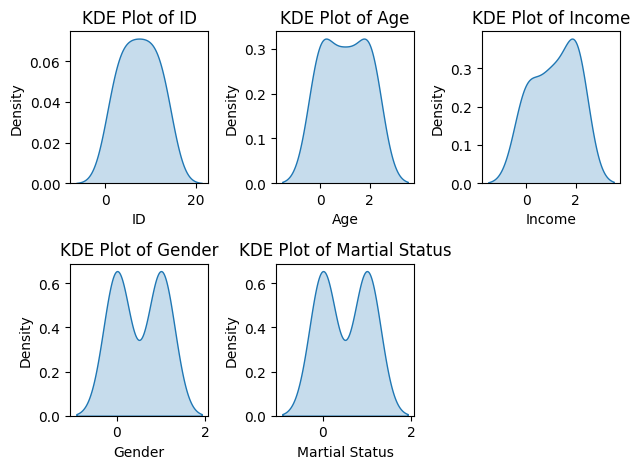

In [30]:
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(2, 3, i + 1)
    sns.kdeplot(df[column], fill=True)
    plt.title(f'KDE Plot of {column}')
plt.tight_layout()
plt.show()